In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

## Initial visualization

Lets visualize our data in order to get a sense of the structure

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"Training dataset shape: {train_df.shape}")
print(f"Training column names: {list(train_df)}")

print(f"\nTest dataset shape: {test_df.shape}")
print(f"Test column names: {list(test_df)}")

Training dataset shape: (891, 12)
Training column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Test dataset shape: (418, 11)
Test column names: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that age has some missing values in the training set. Also based on the mean of 'survived' most people died on that ship. We can also see that 

In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


we are going to drop the PassengerId column as it will not ve necessary for our predtions

In [8]:
train_ids = train_df['PassengerId']
test_ids = test_df['PassengerId']

train_df.drop(['PassengerId','Name'],axis=1,inplace = True)
test_df.drop(['PassengerId','Name'],axis=1,inplace= True)

print(f"Training dataset new shape: {train_df.shape}")
print(f"\nTest dataset new shape: {test_df.shape}")

Training dataset new shape: (891, 10)

Test dataset new shape: (418, 9)


## Cleaning Data

Lets visualize our variables better to look for any missing data, outliers, or anomalies. 

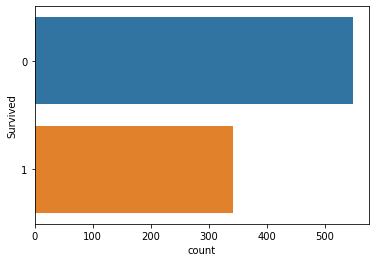

In [9]:
# visualizing target variable

sns.countplot(y= train_df['Survived'])

**Note**
- 0 = Died
- 1 = Survived

We can clearly see that most of the people on the titanic died.

Lets plot the rest of our variables.

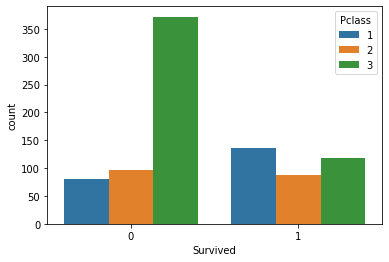

In [10]:
# Pclass survival

sns.countplot(data=train_df,x='Survived',hue='Pclass')


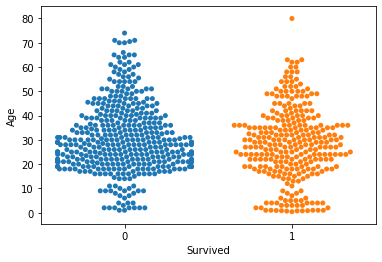

In [14]:
# age vs survival

sns.swarmplot(x='Survived',y='Age',data=train_df)

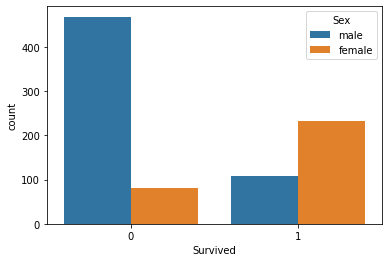

In [17]:
# sex vs survived

sns.countplot(x='Survived',hue='Sex',data=train_df)

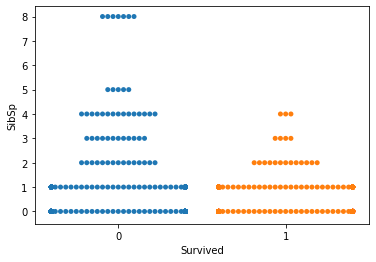

In [25]:
# sipsib vs survived

sns.swarmplot(x='Survived',y='SibSp',data=train_df)

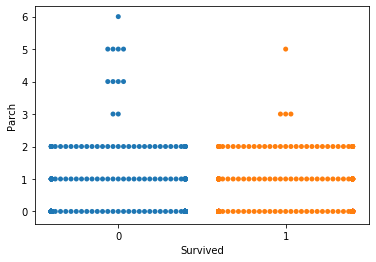

In [27]:
# Parch vs survived

sns.swarmplot(x='Survived',y='Parch',data=train_df)

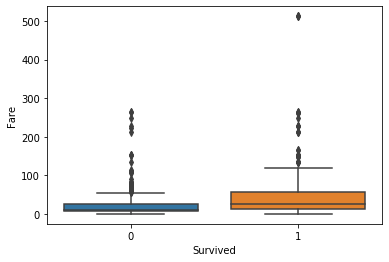

In [30]:
# survived vs price

sns.boxplot(x='Survived',y='Fare',data=train_df)

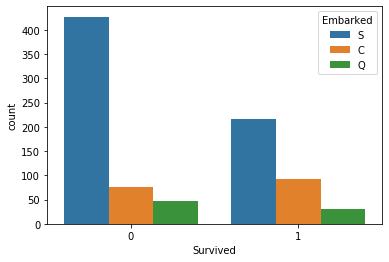

In [32]:
# embarked vs survived

sns.countplot(x='Survived',hue='Embarked',data=train_df)